In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Leer el CSV

In [2]:
mat = pd.read_csv('student-mat.csv', sep=';')
mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
mat2 = mat

## Quitar columnas innecesarias

In [4]:
mat2 = mat2.drop(columns = ['school','age', 'Medu', 'Fedu','Mjob','Fjob', 'Dalc', 'reason'], axis = 1)

## Hacer encoding con lambda

In [5]:
mat2['sex'] = mat2.sex.apply(lambda v: 0 if v =='F' else 1 )

In [6]:
mat2['famsize'] = mat2.famsize.apply(lambda v: 0 if v =='LE3' else 1 )

In [7]:
mat2['address'] = mat2.address.apply(lambda v: 0 if v =='U' else 1)

In [8]:
mat2['Pstatus'] = mat2.Pstatus.apply(lambda v: 0 if v =='T' else 1 )

In [9]:
mat2['absences'] = mat2.absences.apply(lambda v: v/93)

In [10]:
mat2['schoolsup'] = mat2.schoolsup.apply(lambda v: 0 if v =='no' else 1 )

In [11]:
mat2['health'] = mat2.health.apply(lambda v: (v-1)/4)

In [12]:
mat2['famsup'] = mat2.famsup.apply(lambda v: 0 if v =='no' else 1 )

In [13]:
mat2['paid'] = mat2.paid.apply(lambda v: 0 if v =='no' else 1 )

In [14]:
mat2['activities'] = mat2.activities.apply(lambda v: 0 if v =='no' else 1 )

In [15]:
mat2['nursery'] = mat2.nursery.apply(lambda v: 0 if v =='no' else 1 )

In [16]:
mat2['higher'] = mat2.higher.apply(lambda v: 0 if v =='no' else 1 )

In [17]:
mat2['internet'] = mat2.internet.apply(lambda v: 0 if v =='no' else 1 )

In [18]:
mat2['romantic'] = mat2.romantic.apply(lambda v: 0 if v =='no' else 1 )

In [19]:
mat2['Walc'] = mat2.Walc.apply(lambda v: (v-1)/4)

In [20]:
mat2['freetime'] = mat2.freetime.apply(lambda v: (v-1)/4)

In [21]:
mat2['goout'] = mat2.goout.apply(lambda v: (v-1)/4)

In [22]:
mat2['studytime'] = mat2.studytime.apply(lambda v: (v-1)/3)

In [23]:
mat2['traveltime'] = mat2.traveltime.apply(lambda v: (v-1)/3)

In [24]:
mat2['famrel'] = mat2.famrel.apply(lambda v: (v-1)/4)

## Poner un criterio para pasar la materia

In [25]:
#mat2['Improve'] = mat2.G2-mat2.G1
mat2.head()

,sex,address,famsize,Pstatus,guardian,traveltime,studytime,failures,schoolsup,famsup,...,romantic,famrel,freetime,goout,Walc,health,absences,G1,G2,G3
0,0,0,1,1,mother,0.333333,0.333333,0,1,0,...,0,0.75,0.50,0.75,0.00,0.5,0.064516,5,6,6
1,0,0,1,0,father,0.000000,0.333333,0,0,1,...,0,1.00,0.50,0.50,0.00,0.5,0.043011,5,5,6
2,0,0,0,0,mother,0.000000,0.333333,3,1,0,...,0,0.75,0.50,0.25,0.50,0.5,0.107527,7,8,10
3,0,0,1,0,mother,0.000000,0.666667,0,0,1,...,1,0.50,0.25,0.25,0.00,1.0,0.021505,15,14,15
4,0,0,1,0,father,0.000000,0.333333,0,0,1,...,0,0.75,0.50,0.25,0.25,1.0,0.043011,6,10,10


In [26]:
mat2['G1'] = mat2.G1.apply(lambda v: 0 if v<12 else 1)
mat2['G2'] = mat2.G2.apply(lambda v: 0 if v<12 else 1)
mat2['G3'] = mat2.G3.apply(lambda v: 0 if v<12 else 1)
#mat2['Improve'] = mat2.Improve.apply(lambda v: 0 if v<0 else 1)


## One hot encoding

In [27]:
tmp = pd.get_dummies(mat2.guardian,prefix = 'guardian', drop_first=True)
mat2 = pd.concat([mat2, tmp], axis=1 )
mat2 = mat2.drop(columns = ['guardian'], axis = 1)

In [28]:
tmp = pd.get_dummies(mat2.failures,prefix = 'failures', drop_first=True)
mat2 = pd.concat([mat2, tmp], axis=1 )
mat2 = mat2.drop(columns = ['failures'], axis = 1)

In [29]:
mat2.sample(5)

,sex,address,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,...,health,absences,G1,G2,G3,guardian_mother,guardian_other,failures_1,failures_2,failures_3
332,0,0,1,0,0.000000,0.333333,0,0,0,1,...,0.75,0.000000,0,0,0,1,0,0,0,0
213,1,0,1,0,0.000000,0.333333,0,1,1,1,...,1.00,0.161290,0,0,0,1,0,1,0,0
228,1,0,0,0,1.000000,0.333333,1,1,1,1,...,0.50,0.150538,0,0,0,1,0,0,0,0
302,0,0,1,0,0.333333,0.666667,0,1,1,0,...,0.50,0.000000,1,1,1,1,0,0,0,0
158,1,1,1,0,0.666667,0.000000,0,0,0,0,...,0.50,0.021505,1,1,1,1,0,0,0,0


## Correlación

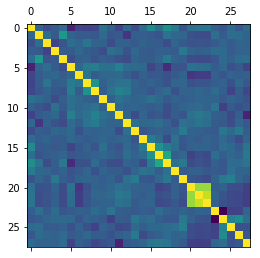

In [30]:
plt.matshow(mat2.corr())
plt.show()

In [31]:
mat3 = mat2

In [32]:
mat2.to_csv('mat_clean.csv', index = False)